# Case Study of Anxiety disorder in India
##### Rakshana V. [2148142]
##### Radhika Bhagwat [2148127]

# Objective:
##### To analyse the severity and occurence of anxiety disorders in India from 1990 to 2019 based on the given Dataset.


# Data Source:
The data is downloaded from the following website:

https://vizhub.healthdata.org/gbd-results/

# Glossary:
* Daly (Disability Adjusted Life Years): The measure of overall disorder severity/burden, expressed as the number of years lost due to ill-health, disability or early death. 
* Prevalence: The proportion of individuals in a population who have a disorder during a specific time period.
* Incidence: The rate of new cases of a disease occurring in a specific population over a particular period of time.

**In this dataset, the disorder under consideration is 'Anxiety' and the values are all measured as a rate per 100,000 population.**

# Importing libraries:

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Importing the Datasets:

In [41]:
Daly = pd.read_csv("Daly_Python_casestudy.csv")
Daly.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,DALYs (Disability-Adjusted Life Years),India,Male,Under 5,Anxiety disorders,Rate,1990,3.199289,5.295867,1.829157
1,DALYs (Disability-Adjusted Life Years),India,Female,Under 5,Anxiety disorders,Rate,1990,5.577910,8.759557,3.183607
2,DALYs (Disability-Adjusted Life Years),India,Male,All Ages,Anxiety disorders,Rate,1990,202.618581,277.877656,139.825974
3,DALYs (Disability-Adjusted Life Years),India,Female,All Ages,Anxiety disorders,Rate,1990,295.840918,403.597854,206.032798
4,DALYs (Disability-Adjusted Life Years),India,Male,5-14 years,Anxiety disorders,Rate,1990,82.615865,128.832620,49.545739


In [42]:
Prevalence = pd.read_csv("Prevalence_Python_casestudy.csv")
Prevalence.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Prevalence,India,Male,All Ages,Anxiety disorders,Rate,1990,2119.167993,2506.786409,1776.388591
1,Prevalence,India,Female,All Ages,Anxiety disorders,Rate,1990,3155.730405,3725.667802,2658.664878
2,Prevalence,India,Male,5-14 years,Anxiety disorders,Rate,1990,836.212077,1173.169161,571.906311
3,Prevalence,India,Female,5-14 years,Anxiety disorders,Rate,1990,1463.603951,2048.746596,1001.262322
4,Prevalence,India,Male,15-49 years,Anxiety disorders,Rate,1990,3030.512681,3755.601033,2442.883933


In [43]:
Incidence = pd.read_csv("Incidence_Python_casestudy.csv")
Incidence.tail()

,measure,location,sex,age,cause,metric,year,val,upper,lower
415,Incidence,India,Female,50-69 years,Anxiety disorders,Rate,2019,539.635306,744.305610,372.842771
416,Incidence,India,Male,70+ years,Anxiety disorders,Rate,2019,282.662591,381.366433,210.081230
417,Incidence,India,Female,70+ years,Anxiety disorders,Rate,2019,235.563235,321.620886,170.521575
418,Incidence,India,Male,Age-standardized,Anxiety disorders,Rate,2019,415.260968,494.535287,341.078413
419,Incidence,India,Female,Age-standardized,Anxiety disorders,Rate,2019,562.971854,672.107919,456.544633


#### This data needs to be cleaned and formatted into the required formats for analysis. This is done in the next section.

# Data Cleaning:

### 1. Disability-Adjusted Life Years (rate per 100,000 population):

In [44]:
Daly.drop(Daly[['location', 'measure', 'metric', 'cause']], inplace=True, axis=1)
Daly.columns= ['Sex', 'Age_group', 'Year', 'Daly', 'Upper_Daly', 'Lower_Daly']
Daly.head()

,Sex,Age_group,Year,Daly,Upper_Daly,Lower_Daly
0,Male,Under 5,1990,3.199289,5.295867,1.829157
1,Female,Under 5,1990,5.577910,8.759557,3.183607
2,Male,All Ages,1990,202.618581,277.877656,139.825974
3,Female,All Ages,1990,295.840918,403.597854,206.032798
4,Male,5-14 years,1990,82.615865,128.832620,49.545739


In [45]:
Daly_male = Daly[(Daly.Sex == 'Male')]
Daly_male = Daly_male.drop('Sex', axis = 1)

Daly_female = Daly[(Daly.Sex == 'Female')]
Daly_female = Daly_female.drop('Sex', axis = 1)


Daly_male_average = pd.pivot_table(Daly_male, values= 'Daly', index = 'Age_group', aggfunc= np.average)
Daly_male_average = Daly_male_average.drop(['Age-standardized', 'All Ages'])

Daly_female_average = pd.pivot_table(Daly_female, values= 'Daly', index = 'Age_group', aggfunc= np.average)
Daly_female_average = Daly_female_average.drop(['Age-standardized', 'All Ages'])

In [46]:
Daly_male_average

,Daly
Age_group,
15-49 years,271.654488
5-14 years,85.887589
50-69 years,301.258304
70+ years,241.727157
Under 5,3.257341


In [47]:
Daly_female_average

,Daly
Age_group,
15-49 years,408.973626
5-14 years,151.473969
50-69 years,440.985720
70+ years,346.138296
Under 5,5.761375


### 2. Prevalence (rate per 100,000 population):

In [48]:
Prevalence.drop(Prevalence[['location', 'measure', 'metric', 'cause']], inplace=True, axis=1)
Prevalence.columns= ['Sex', 'Age_group', 'Year', 'Prevalence', 'Upper_Prevalence', 'Lower_Prevalence']
Prevalence.head()

,Sex,Age_group,Year,Prevalence,Upper_Prevalence,Lower_Prevalence
0,Male,All Ages,1990,2119.167993,2506.786409,1776.388591
1,Female,All Ages,1990,3155.730405,3725.667802,2658.664878
2,Male,5-14 years,1990,836.212077,1173.169161,571.906311
3,Female,5-14 years,1990,1463.603951,2048.746596,1001.262322
4,Male,15-49 years,1990,3030.512681,3755.601033,2442.883933


In [49]:
Prevalence_male = Prevalence[(Prevalence.Sex == 'Male')]
Prevalence_male = Prevalence_male.drop('Sex', axis = 1)

Prevalence_female = Prevalence[(Prevalence.Sex == 'Female')]
Prevalence_female = Prevalence_female.drop('Sex', axis = 1)

In [50]:
Prevalence_male

,Age_group,Year,Prevalence,Upper_Prevalence,Lower_Prevalence
0,All Ages,1990,2119.167993,2506.786409,1776.388591
2,5-14 years,1990,836.212077,1173.169161,571.906311
4,15-49 years,1990,3030.512681,3755.601033,2442.883933
6,50-69 years,1990,3527.403044,4414.890055,2831.408876
8,70+ years,1990,2952.169060,3771.075746,2319.765531
...,...,...,...,...,...
410,15-49 years,2019,2936.534187,3603.610956,2402.333155
412,50-69 years,2019,3553.764524,4379.229012,2883.750179
414,70+ years,2019,3071.316342,3849.582498,2449.096632
416,Age-standardized,2019,2379.932680,2780.599843,2055.683423


In [51]:
Prevalence_female

,Age_group,Year,Prevalence,Upper_Prevalence,Lower_Prevalence
1,All Ages,1990,3155.730405,3725.667802,2658.664878
3,5-14 years,1990,1463.603951,2048.746596,1001.262322
5,15-49 years,1990,4491.288756,5573.491304,3639.631240
7,50-69 years,1990,4895.166220,6037.197186,3953.746125
9,70+ years,1990,4134.608629,5308.959155,3247.330349
...,...,...,...,...,...
411,15-49 years,2019,4516.681744,5471.708874,3729.066517
413,50-69 years,2019,4965.462068,6043.906421,4022.208314
415,70+ years,2019,4115.793904,5199.766066,3286.413317
417,Age-standardized,2019,3577.763987,4143.307368,3082.711145


In [52]:
Prevalence_male_average = pd.pivot_table(Prevalence_male, values= ['Prevalence', 'Upper_Prevalence', 'Lower_Prevalence'], index = 'Year', aggfunc= np.average)
Prevalence_female_average = pd.pivot_table(Prevalence_female, values= ['Prevalence', 'Upper_Prevalence', 'Lower_Prevalence'], index = 'Year', aggfunc= np.average)
Prevalence_male_average.head(10)

,Lower_Prevalence,Prevalence,Upper_Prevalence
Year,,,
1990,1717.097590,2132.382225,2646.933982
1991,1716.935868,2132.887362,2646.926585
1992,1713.737495,2129.399323,2640.781397
1993,1707.701057,2122.515612,2632.733578
1994,1698.642225,2112.799106,2621.861128
1995,1688.196988,2100.862971,2610.187370
1996,1660.832396,2064.037620,2563.152680
1997,1606.122274,1994.507074,2475.721340
1998,1546.990613,1915.727441,2373.710270


### 3. Incidence (rate per 100,000 population):

In [53]:
Incidence.drop(Incidence[['location', 'measure', 'metric', 'cause']], inplace=True, axis=1)
Incidence.columns= ['Sex', 'Age_group', 'Year', 'Incidence', 'Upper_Incidence', 'Lower_Incidence']
Incidence.head()

,Sex,Age_group,Year,Incidence,Upper_Incidence,Lower_Incidence
0,Male,Under 5,1990,33.463588,48.482666,20.775383
1,Female,Under 5,1990,58.222362,83.507251,37.393510
2,Male,All Ages,1990,395.331849,481.074645,318.964402
3,Female,All Ages,1990,539.527232,653.848575,430.532364
4,Male,5-14 years,1990,271.249279,369.562729,195.686573


In [54]:
Incidence_male = Incidence[(Incidence.Sex == 'Male')]
Incidence_male = Incidence_male.drop('Sex', axis = 1)

Incidence_female = Incidence[(Incidence.Sex == 'Female')]
Incidence_female = Incidence_female.drop('Sex', axis = 1)


print("Incidence for Males: \n\n", Incidence_male.head())
print("\n\n\nIncidence for Females: \n\n", Incidence_female.head())

Incidence for Males: 

      Age_group  Year   Incidence  Upper_Incidence  Lower_Incidence
0      Under 5  1990   33.463588        48.482666        20.775383
2     All Ages  1990  395.331849       481.074645       318.964402
4   5-14 years  1990  271.249279       369.562729       195.686573
6  15-49 years  1990  539.638427       692.296937       409.739934
8  50-69 years  1990  515.596664       702.005896       362.074613



Incidence for Females: 

      Age_group  Year   Incidence  Upper_Incidence  Lower_Incidence
1      Under 5  1990   58.222362        83.507251        37.393510
3     All Ages  1990  539.527232       653.848575       430.532364
5   5-14 years  1990  448.017729       607.181715       324.088095
7  15-49 years  1990  731.248083       949.665379       545.504113
9  50-69 years  1990  555.637220       779.984508       385.723961


# Data Description:
The description of all the tables is given in this section. 

In [55]:
Daly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         420 non-null    object 
 1   Age_group   420 non-null    object 
 2   Year        420 non-null    int64  
 3   Daly        420 non-null    float64
 4   Upper_Daly  420 non-null    float64
 5   Lower_Daly  420 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 19.8+ KB


##### We can see that sex and age are object, that is categorical variables and Year is an integer.

In [56]:
Daly.describe()

,Year,Daly,Upper_Daly,Lower_Daly
count,420.000000,420.000000,420.000000,420.000000
mean,2004.500000,236.274960,329.279125,161.240517
std,8.665764,132.464796,181.300714,92.383770
min,1990.000000,2.638826,4.322301,1.485471
25%,1997.000000,145.277009,218.831492,89.364481
50%,2004.500000,249.740508,351.946519,170.569590
75%,2012.000000,338.791586,456.325625,230.340109
max,2019.000000,449.916364,617.507497,314.247831


# Visualisation:

### To compare the average Daly in India for males and females:

### Bar graph:

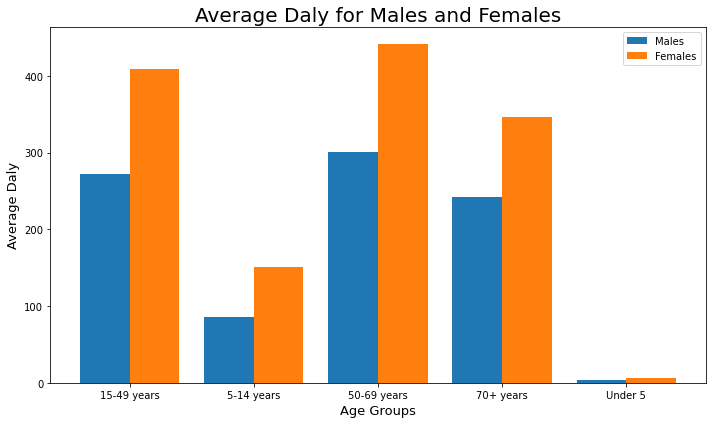

In [57]:
X = Daly_female_average.index
X_axis = np.arange(len(Daly_female_average.index))
plt.subplots(figsize = (10,6))
plt.bar(X_axis - 0.2, Daly_male_average['Daly'], 0.4, label = 'Males')
plt.bar(X_axis + 0.2, Daly_female_average['Daly'], 0.4, label = 'Females')
plt.xticks(X_axis, X)
plt.xlabel("Age Groups", fontsize = 13)
plt.ylabel("Average Daly", fontsize = 13)
plt.title("Average Daly for Males and Females", fontsize = 20)
plt.legend()
plt.show()

### Boxplot:

<AxesSubplot:xlabel='Age_group', ylabel='Daly'>

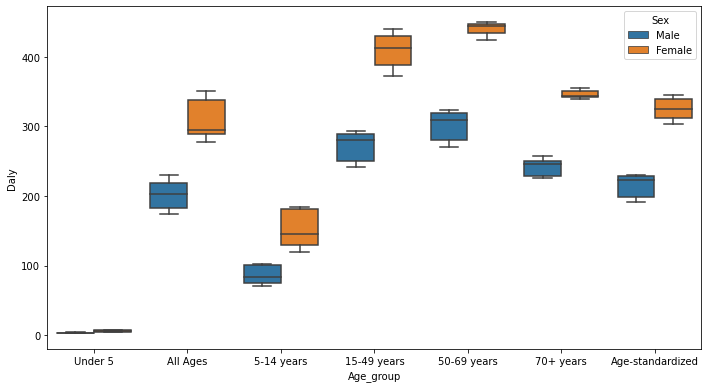

In [58]:
plt.rcParams["figure.figsize"] = [10.00, 5.50]
plt.rcParams["figure.autolayout"] = True
sns.boxplot(x = 'Age_group',
            y = 'Daly',
            data = Daly,
            hue= 'Sex')

### Interpretation:
* From the above graphs we can see that the average Daly due to anxiety for females is significantly more than that for males for all the age-groups.
* For the 'Under 5' age groups, there is hardly any difference in Daly due to anxiety.
* Maximum difference is seen for the age-group '70+ years'.

### To compare the average Prevalence of anxiety in India for males and females over the years 1990 and 2019:

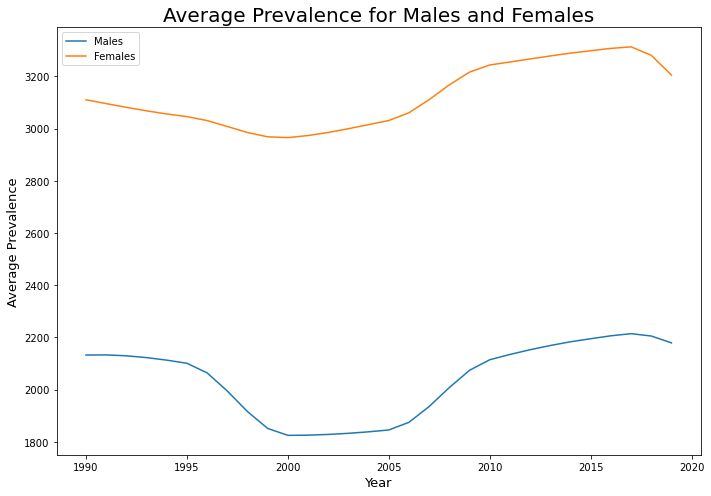

In [59]:
plt.subplots(figsize = (10,7))
plt.plot(Prevalence_male_average.index, Prevalence_male_average['Prevalence'], label = 'Males')
plt.plot(Prevalence_female_average.index, Prevalence_female_average['Prevalence'], label = 'Females')

plt.xlabel("Year", fontsize = 13)
plt.ylabel("Average Prevalence", fontsize = 13)
plt.title("Average Prevalence for Males and Females", fontsize = 20)
plt.legend()
plt.show()

### Interpretation:

* We can see that there is significant difference between the average Prevalence of anxiety in males and females.
* They follow the same pattern and the difference has not changed much over the years


### Trend of the average prevalence of anxiety:

In [60]:
Prevalence_female_average.sort_values(by = 'Prevalence').head(3)

,Lower_Prevalence,Prevalence,Upper_Prevalence
Year,,,
2000,2408.279836,2965.388885,3644.815448
1999,2412.600594,2968.434410,3647.169730
2001,2416.134338,2973.331681,3652.003187


In [61]:
Prevalence_female_average.sort_values(by = 'Prevalence').tail(3)

,Lower_Prevalence,Prevalence,Upper_Prevalence
Year,,,
2015,2695.235353,3298.350180,4041.336874
2016,2704.678932,3307.218277,4048.269771
2017,2710.406404,3313.221581,4051.982816


In [62]:
Prevalence_average = pd.pivot_table(Prevalence, values= ['Prevalence', 'Upper_Prevalence', 'Lower_Prevalence'], index = 'Year', aggfunc= np.average)
Prevalence_average.head(10)

,Lower_Prevalence,Prevalence,Upper_Prevalence
Year,,,
1990,2114.089617,2621.390567,3249.134028
1991,2109.953898,2614.299587,3238.591344
1992,2104.108821,2605.409149,3226.590918
1993,2096.854058,2595.265932,3213.214509
1994,2086.900445,2584.384744,3200.232501
1995,2076.611785,2573.345843,3188.505142
1996,2058.524493,2547.386893,3153.464241
1997,2023.689554,2501.280288,3092.685662
1998,1986.669521,2450.334170,3022.115397


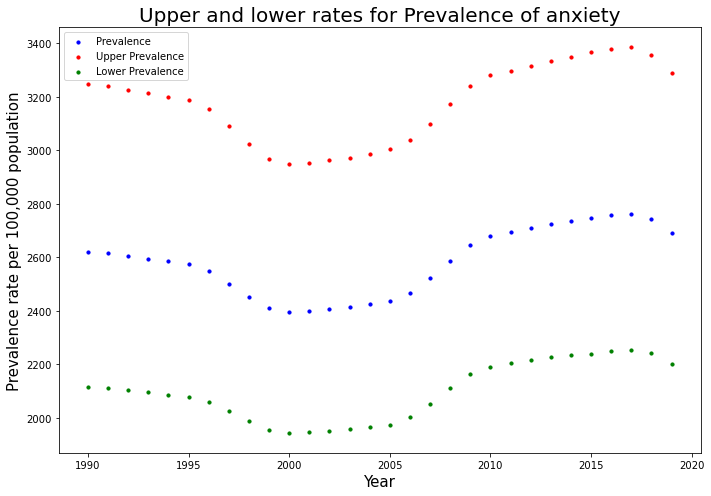

In [63]:
fig = plt.figure(figsize= (10,7))
ax1 = fig.add_subplot(111)

ax1.scatter(Prevalence_average.index, Prevalence_average['Prevalence'], s=10, c='b', marker="o", label='Prevalence')
ax1.scatter(Prevalence_average.index, Prevalence_average['Upper_Prevalence'], s=10, c='r', marker="o", label='Upper Prevalence')
ax1.scatter(Prevalence_average.index, Prevalence_average['Lower_Prevalence'], s=10, c='g', marker="o", label='Lower Prevalence')

plt.title("Upper and lower rates for Prevalence of anxiety", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Prevalence rate per 100,000 population", fontsize = 15)
plt.legend()
plt.show()

### Interpretation:
There is a significant difference between the prevalence rate and its lower and upper values.

### Trend of the average incidences of anxiety:

In [64]:
Incidence_male_average = pd.pivot_table(Incidence_male, values= 'Incidence', index = 'Year', aggfunc= np.average)
Incidence_female_average = pd.pivot_table(Incidence_female, values= 'Incidence', index = 'Year', aggfunc= np.average)

In [65]:
Incidence_average = pd.pivot_table(Incidence, values= ['Incidence', 'Upper_Incidence', 'Lower_Incidence'], index = 'Year', aggfunc= np.average)
Incidence_average.head(10)

,Incidence,Lower_Incidence,Upper_Incidence
Year,,,
1990,400.345499,301.570724,519.425138
1991,399.447169,300.953808,518.124793
1992,398.159894,300.232088,516.501261
1993,396.589441,298.957277,514.279687
1994,394.813168,298.081795,511.575770
1995,392.926724,296.741493,508.712799
1996,388.172415,293.274669,502.313576
1997,379.682273,286.866596,491.063969
1998,370.236077,279.674700,479.140059


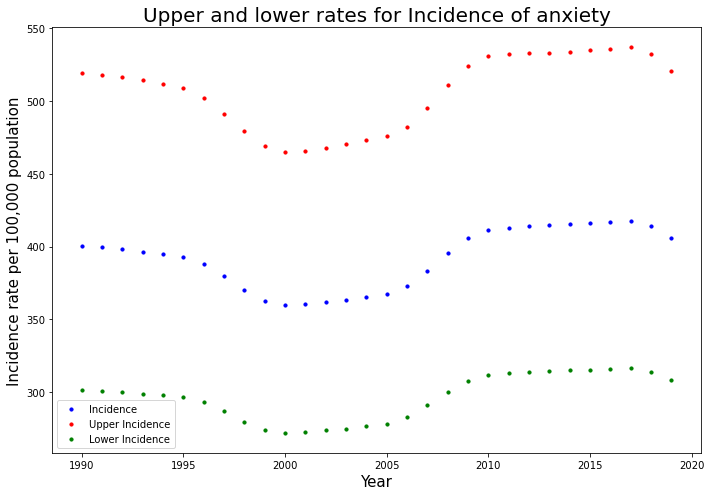

In [66]:
fig = plt.figure(figsize= (10,7))
ax1 = fig.add_subplot(111)

ax1.scatter(Incidence_average.index, Incidence_average['Incidence'], s=10, c='b', marker="o", label='Incidence')
ax1.scatter(Incidence_average.index, Incidence_average['Upper_Incidence'], s=10, c='r', marker="o", label='Upper Incidence')
ax1.scatter(Incidence_average.index, Incidence_average['Lower_Incidence'], s=10, c='g', marker="o", label='Lower Incidence')

plt.title("Upper and lower rates for Incidence of anxiety", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Incidence rate per 100,000 population", fontsize = 15)
plt.legend()
plt.show()

### Comparing average incidences for males and females from 1990 to 2019:

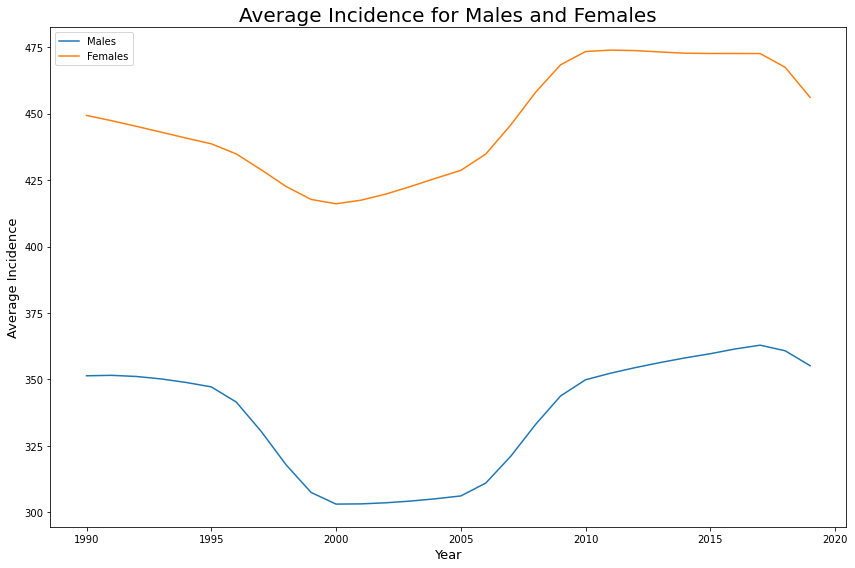

In [67]:
plt.subplots(figsize = (12,8))
plt.plot(Incidence_male_average.index, Incidence_male_average['Incidence'], label = 'Males')
plt.plot(Incidence_female_average.index, Incidence_female_average['Incidence'], label = 'Females')

plt.xlabel("Year", fontsize = 13)
plt.ylabel("Average Incidence", fontsize = 13)
plt.title("Average Incidence for Males and Females",fontsize = 20)
plt.legend()
plt.show()

### Interpretation:
* The average incidences for males and females follow the same pattern over the years but is higher for females than for males.
* The average incidences dropped significantly from 1995 and started increasing again from 2005/

### Comparing the incidence rate (per 100,000 population) for various age-groups from 1990 to 2019:

In [68]:
Incidence_U5 = Incidence[(Incidence['Age_group']) == 'Under 5']
Incidence_U5 = pd.pivot_table(Incidence_U5, values= 'Incidence', index = 'Year', aggfunc= np.average)

Incidence_5_14 = Incidence[(Incidence['Age_group']) == '5-14 years']
Incidence_5_14 = pd.pivot_table(Incidence_5_14, values= 'Incidence', index = 'Year', aggfunc= np.average)

Incidence_15_49 = Incidence[(Incidence['Age_group']) == '15-49 years']
Incidence_15_49 = pd.pivot_table(Incidence_15_49, values= 'Incidence', index = 'Year', aggfunc= np.average)

Incidence_50_69 = Incidence[(Incidence['Age_group']) == '50-69 years']
Incidence_50_69 = pd.pivot_table(Incidence_50_69, values= 'Incidence', index = 'Year', aggfunc= np.average)

Incidence_70 = Incidence[(Incidence['Age_group']) == '70+ years']
Incidence_70 = pd.pivot_table(Incidence_70, values= 'Incidence', index = 'Year', aggfunc= np.average)


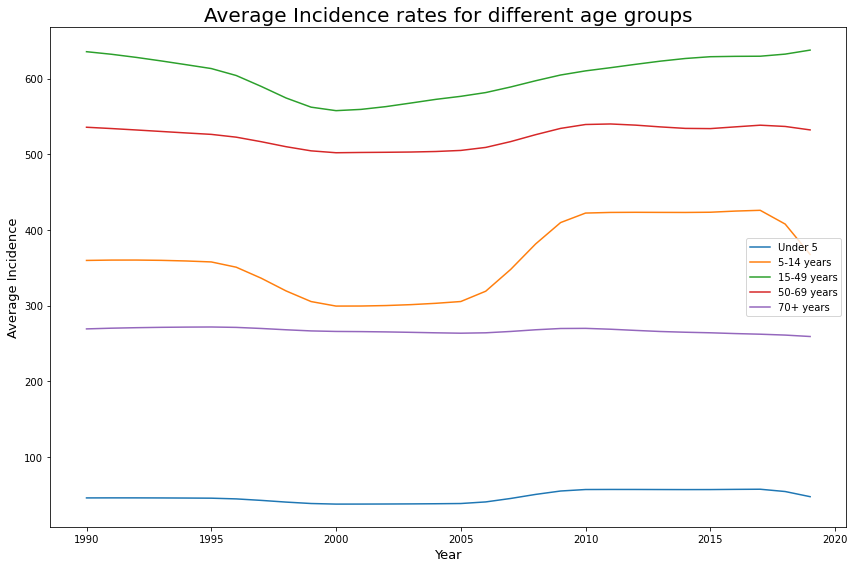

In [69]:
plt.subplots(figsize = (12,8))
plt.plot(Incidence_U5.index, Incidence_U5['Incidence'], label = 'Under 5')
plt.plot(Incidence_5_14.index, Incidence_5_14['Incidence'], label = '5-14 years')
plt.plot(Incidence_15_49.index, Incidence_15_49['Incidence'], label = '15-49 years')
plt.plot(Incidence_50_69.index, Incidence_50_69['Incidence'], label = '50-69 years')
plt.plot(Incidence_70.index, Incidence_70['Incidence'], label = '70+ years')

plt.xlabel("Year", fontsize = 13)
plt.ylabel("Average Incidence", fontsize = 13)
plt.title("Average Incidence rates for different age groups",fontsize = 20)
plt.legend()
plt.show()

### Interpretation:
* The highest incidence rate is for the age-group 15-49 years and the lowest is for Under 5 age group.
* The incidence rate per 100,00 population is constant for the age groups: Under 5 years, 70+ years and 50-69 years.
* There was fall in the incidence rate after 1995 for the age group 5-14 years and 15-49 years and then rapid increase after 2005.

### Comparing the incidence rate (per 100,000 population) for males and females from 1990 to 2019:

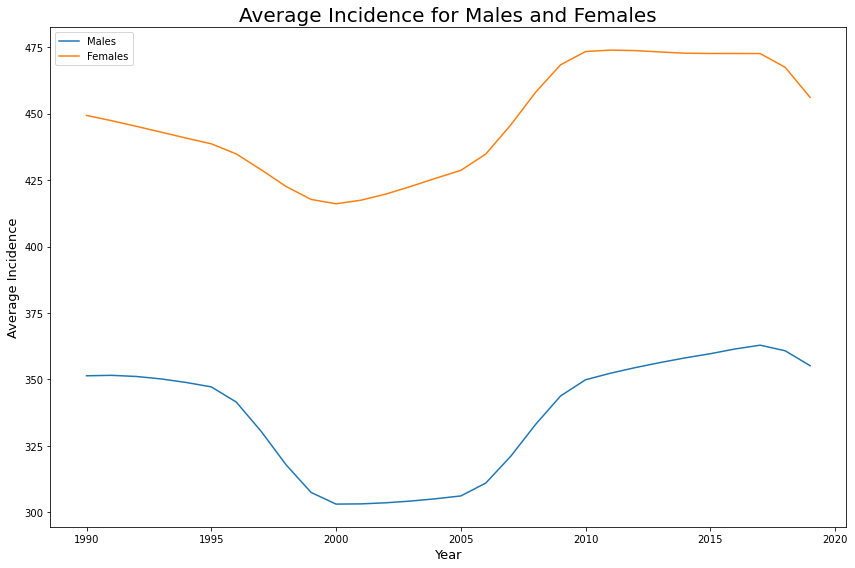

In [70]:
plt.subplots(figsize = (12,8))
plt.plot(Incidence_male_average.index, Incidence_male_average['Incidence'], label = 'Males')
plt.plot(Incidence_female_average.index, Incidence_female_average['Incidence'], label = 'Females')

plt.xlabel("Year", fontsize = 13)
plt.ylabel("Average Incidence", fontsize = 13)
plt.title("Average Incidence for Males and Females",fontsize = 20)
plt.legend()
plt.show()

### Comparing average Daly, Prevalence and Incidences for anxiety by pie-charts:

In [71]:
Daly_year_wise = pd.pivot_table(Daly, index= 'Age_group', values = 'Daly', aggfunc= np.average)
Prevalence_year_wise = pd.pivot_table(Prevalence, index= 'Age_group', values = 'Prevalence', aggfunc= np.average)
Incidence_year_wise = pd.pivot_table(Incidence, index= 'Age_group', values = 'Incidence', aggfunc= np.average)

Daly_year_wise['Prevalence'] = Prevalence_year_wise['Prevalence']
Daly_year_wise['Incidence'] = Incidence_year_wise['Incidence']


Daly_year_wise = Daly_year_wise.drop(['Age-standardized', 'All Ages'], axis = 0)
Daly_year_wise.reset_index(inplace = True)
Daly_year_wise

,Age_group,Daly,Prevalence,Incidence
0,15-49 years,340.314057,3554.790678,603.266080
1,5-14 years,118.680779,1199.593950,363.254478
2,50-69 years,371.122012,4143.296272,523.587998
3,70+ years,293.932726,3540.266229,266.721227
4,Under 5,4.509358,44.394106,47.236646


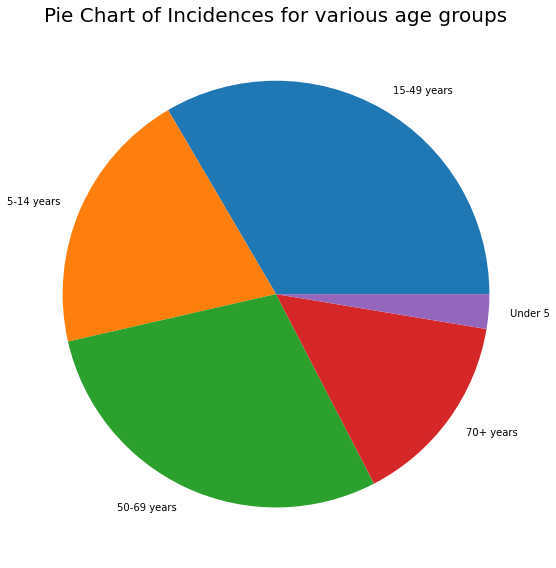

In [72]:
plt.figure(figsize= (10,8))
plt.pie(Daly_year_wise['Incidence'], labels=Daly_year_wise['Age_group'])
plt.title("Pie Chart of Incidences for various age groups", fontsize =20)
plt.show()

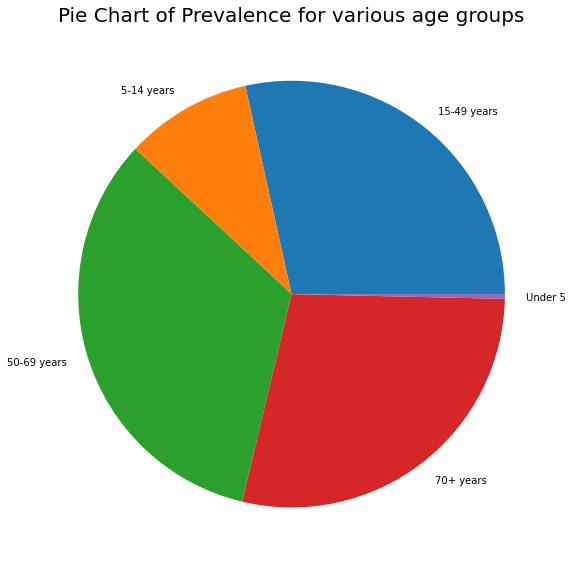

In [73]:
plt.figure(figsize= (10,8))
plt.pie(Daly_year_wise['Prevalence'], labels=Daly_year_wise['Age_group'])
plt.title("Pie Chart of Prevalence for various age groups", fontsize =20)
plt.show()

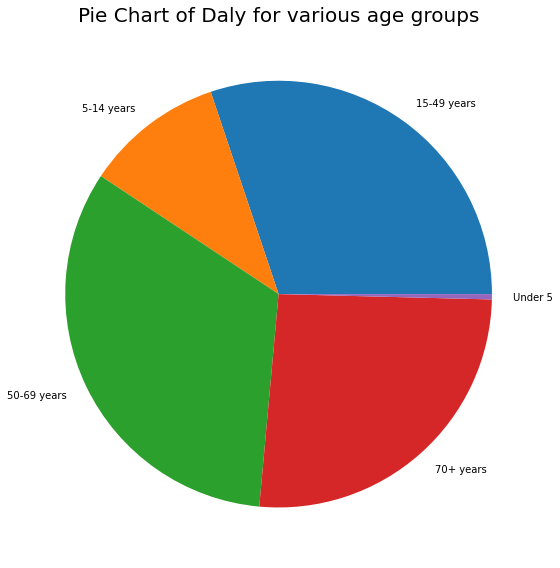

In [74]:
plt.figure(figsize= (10,8))
plt.pie(Daly_year_wise['Daly'], labels=Daly_year_wise['Age_group'])
plt.title("Pie Chart of Daly for various age groups", fontsize =20)
plt.show()

### Interpretation:
* The Prevalence and Daly rates for the 'Under 5' Age group is almost negligible. But the Incidence rate is comparitively significant. This means that the new cases of anxiety for the 'Under 5' age-group are significant.
* The Daly for the age groups 5-14 and 15-49 is comparitively high than their Prevalence and incidences. 
* New cases for anxiety are higher in the age group of 50-69.


### Time Series model for the rate of incidences of anxiety (per 100,000 population):

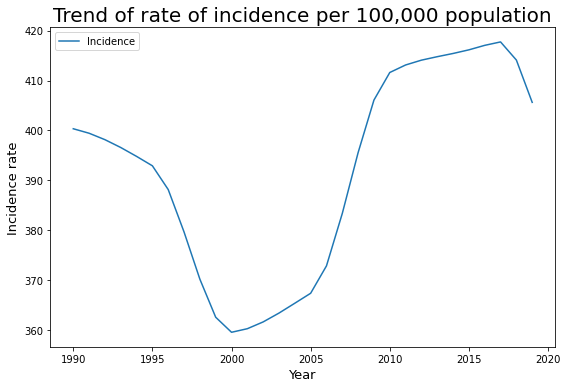

In [75]:
Incidence_time_wise = pd.pivot_table(Incidence, values='Incidence', index='Year', aggfunc=np.average)
Incidence_time_wise.plot(figsize = (8,5.5))
plt.title('Trend of rate of incidence per 100,000 population', fontsize = 20)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Incidence rate', fontsize = 13)
plt.legend()
plt.show()

### Interpretation:
* The incidence rate has decreased significantly from 1995 to 2000.
* It increased significantly after 2005 till 2010.
* We can again see the fall from 2016.

In [76]:
ses = SimpleExpSmoothing(Incidence_time_wise['Incidence'])
alpha = 0.9
model = ses.fit(smoothing_level = alpha, optimized = False)
forcast = model.forecast(3)
forcast

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


30    406.50846
31    406.50846
32    406.50846
dtype: float64

In [77]:
Incidence_time_wise.reset_index(inplace=True)
Incidence_time_wise.head()

,Year,Incidence
0,1990,400.345499
1,1991,399.447169
2,1992,398.159894
3,1993,396.589441
4,1994,394.813168


### Dicky Fuller Test:
##### Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root,meaning it is non-stationary. It has some time dependent structure.

##### Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [78]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
import pandas as pd
def dicky_fuller_test(x):
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print("Fail to reject the null hypothesis (H0).")
    else:
        print("Reject the null hypothesis (H0).")
 
dicky_fuller_test(Incidence_time_wise['Incidence'])

ADF Statistic: -0.417058
p-value: 0.907212
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646
Fail to reject the null hypothesis (H0).


##### The p-value is >0.05 so we accept H0 and conclude that it suggests the Incidence has a unit root,meaning it is non-stationary. It has some time dependent structure.¶

### Seasonal Decompose:

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10,10)})
y = Incidence_time_wise['Incidence'].to_frame()

### Multiplicative Decomposition 

In [80]:
result_mul = seasonal_decompose(y, model='multiplicative',period = 1)

### Additive Decomposition

In [81]:
result_add = seasonal_decompose(y, model='additive',period = 1)

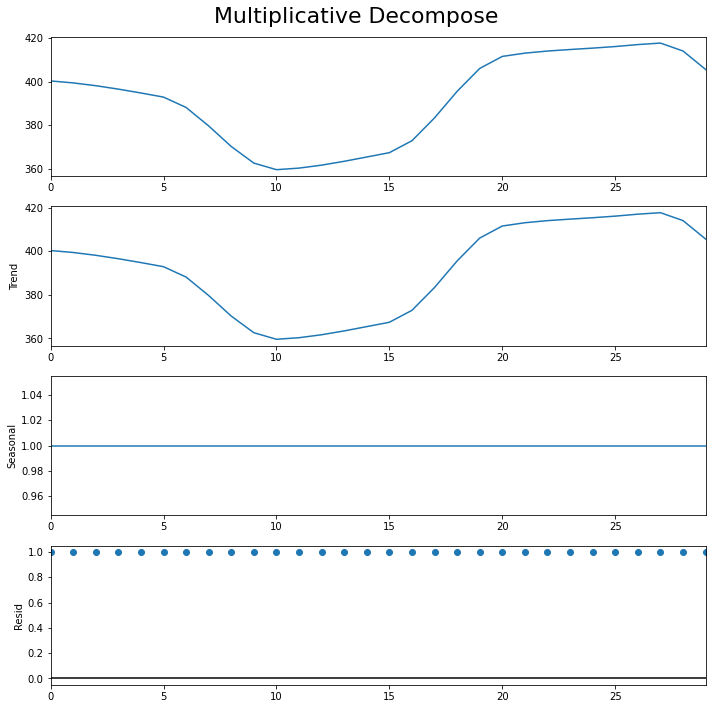

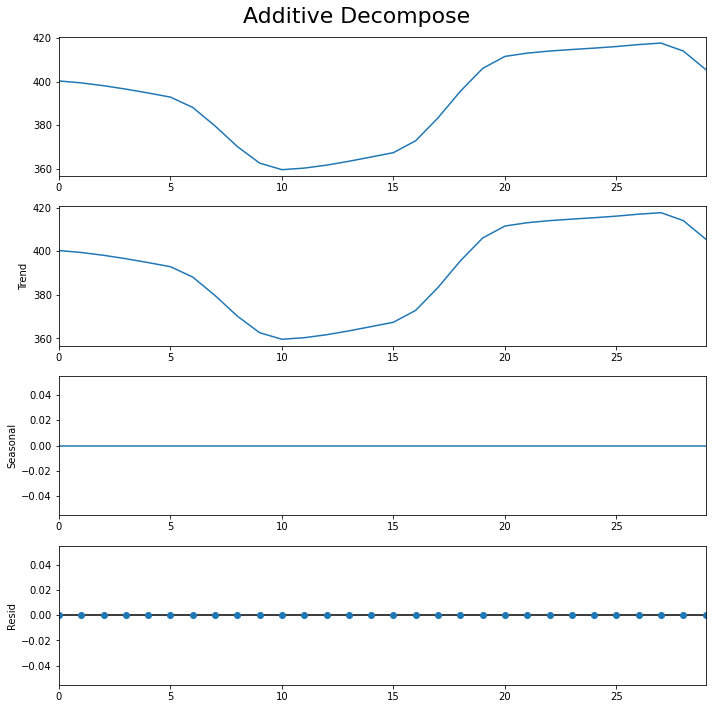

In [82]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

#### In both Additive and Multiplicative decompostion we can see that, the trend is the only contributing factor in the time series graph.This was also observed in the previous graph as increase or decrease in incidence value which does not repeat and there is no seasonality or resdual affecting Incidence.

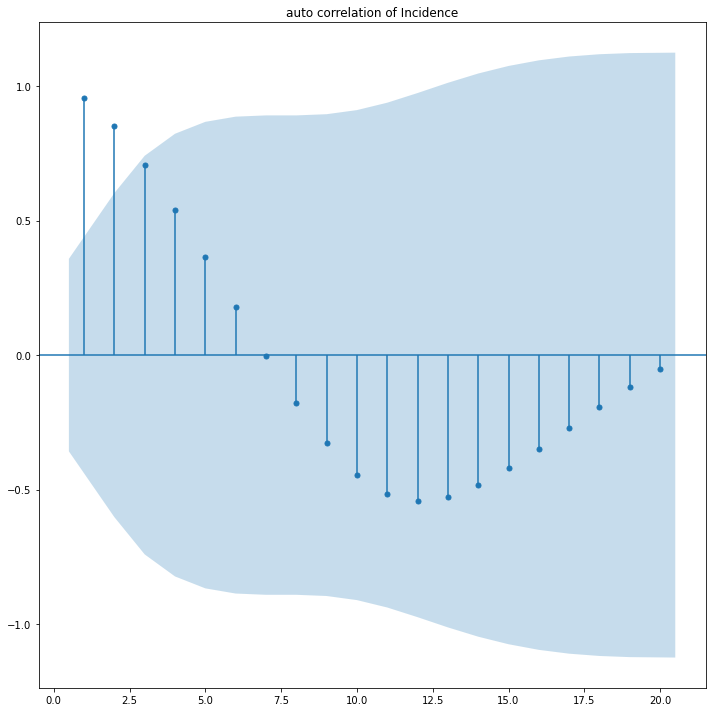

In [83]:
# Auto correlation of Incidence
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(Incidence_time_wise['Incidence'], lags=20,title='auto correlation of Incidence',zero=False)
plt.show()

### The incidence data is highly correlated as the plot indicates a oscillatory curve.

# Conclusion
1. From the daly data: The average daly for women is higher than men throughout the age groups.For the 'Under 5' age groups, there is hardly any difference in Daly due to anxiety.Maximum difference is seen for the age-group '70+ years'.

2. We can see that there is significant difference between the average Prevalence of anxiety in males and females.They follow the same pattern and the difference has not changed much over the years. 
3. The Prevalence and Daly rates for the 'Under 5' Age group is almost negligible. But the Incidence rate is comparitively significant. This means that the new cases of anxiety for the 'Under 5' age-group are significant.The Daly for the age groups 5-14 and 15-49 is comparitively high than their Prevalence and incidences.New cases for anxiety are higher in the age group of 50-69.
4. The incidence rate has decreased significantly from 1995 to 2000.It increased significantly after 2005 till 2010.We can again see the fall from 2016.
5. Incidence has a unit root,meaning it is non-stationary. It has some time dependent structure.
6. In both Additive and Multiplicative decompostion we can see that, the trend is the only contributing factor in the time series graph.This was also observed in the previous graph as increase or decrease in incidence value which does not repeat and there is no seasonality or resdual affecting Incidence.However there might be some seasonality in the data if we observed data for much more years. 
7. The incidence data throughout the years is highly autocorrelated.